# Projeto para Treinar Clustering

## Descrição do Projeto
Este projeto é uma oportunidade para aplicar os conhecimentos adquiridos durante o MBA em Data Science e Analytics na USP/Esalq, explorando técnicas avançadas de análise de dados para insights estratégicos no contexto de e-commerce.

Utilizando técnicas de clustering para segmentar produtos com base nos métodos de fulfilment (Amazon e Merchant) em um ambiente de e-commerce. O objetivo é explorar como diferentes métodos de entrega afetam a distribuição de categorias de produtos. Forcencendo dados para otimização de operações logísticas e estratégias de vendas.

## Base de Dados
Utilizarei a base de dados disponível no Kaggle, que contém dados de vendas da Amazon.

### Link para a Base de Dados
[Acesse a base de dados no Kaggle](https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data?resource=download)

### Importar bibliotecas e configurações

In [199]:
## importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.spatial.distance import pdist

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [200]:
## configurações
pd.set_option('display.max_columns', None)

### Carregar e conhecer o dataset

In [201]:
# Carregar os dados 
df = pd.read_csv('/Users/brunnabrito/Desktop/projeto clustering/Amazon Sale Report.csv')

/var/folders/9t/811ftl5j13d0fm2p8565b9b80000gn/T/ipykernel_50376/3241588029.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/brunnabrito/Desktop/projeto clustering/Amazon Sale Report.csv')


In [202]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN


In [203]:
df.shape

(128975, 24)

In [204]:
df['Unnamed: 22'].unique()

array([nan, False], dtype=object)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [206]:
df.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

In [207]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


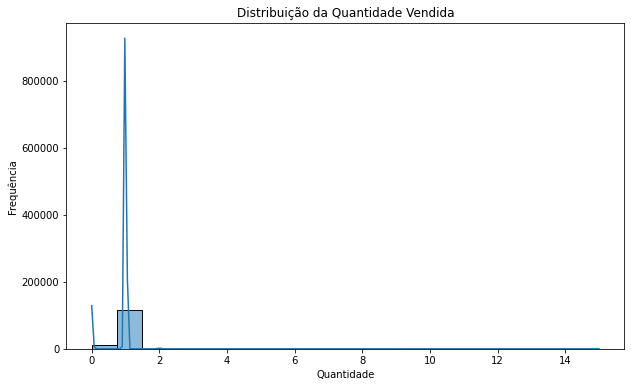

In [208]:
# Distribuição das Variáveis

plt.figure(figsize=(10, 6))
sns.histplot(df['Qty'], bins=20, kde=True)
plt.title('Distribuição da Quantidade Vendida')
plt.xlabel('Quantidade')
plt.ylabel('Frequência')
plt.show()

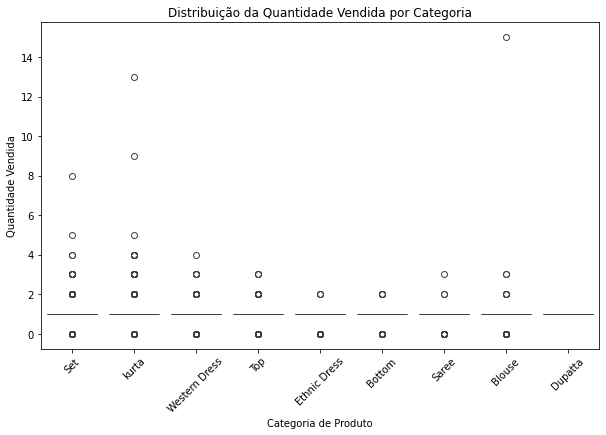

In [209]:
# boxplot da quantidade vendida por categoria
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Qty', data=df)
plt.title('Distribuição da Quantidade Vendida por Categoria')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

In [210]:
df.isnull().sum()


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [211]:
df.groupby(['Category', 'Fulfilment'])['Qty'].sum()

Category       Fulfilment
Blouse         Amazon          676
               Merchant        187
Bottom         Amazon          238
               Merchant        160
Dupatta        Amazon            3
Ethnic Dress   Amazon          796
               Merchant        257
Saree          Amazon          127
               Merchant         25
Set            Amazon        33136
               Merchant      12153
Top            Amazon         7733
               Merchant       2170
Western Dress  Amazon         8060
               Merchant       5883
kurta          Amazon        33318
               Merchant      11727
Name: Qty, dtype: int64

In [212]:
# Calcular limites para outliers usando o método IQR
Q1 = df['Qty'].quantile(0.25)
Q3 = df['Qty'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(f'Limite Inferior: {limite_inferior}, Limite Superior: {limite_superior}')

# Identificar outliers
outliers = df[(df['Qty'] < limite_inferior) | (df['Qty'] > limite_superior)]

Limite Inferior: 1.0, Limite Superior: 1.0


In [213]:
outliers.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN


### Hipóteses Estatísticas:

- **Hipótese Nula (H0):** As variâncias entre os grupos são iguais (homogeneidade das variâncias).
- **Hipótese Alternativa (H1):** Pelo menos uma das variâncias é diferente das outras (heterogeneidade das variâncias).

### Valor-p (p-value):

- Se o valor-p é maior que o nível de significância (0.05), não rejeitamos a hipótese nula (H0). Isso significa que não há evidências suficientes para concluir que as variâncias entre os grupos são diferentes.
- Se o valor-p é menor ou igual ao nível de significância (geralmente 0.05), rejeitamos a hipótese nula (H0). Isso sugere que pelo menos uma das variâncias entre os grupos é estatisticamente diferente.

### Teste de Levene
- O teste de Levene foi escolhido para verificar a homogeneidade das variâncias entre diferentes grupos de dados, especificamente para determinar se as quantidades vendidas de diferentes categorias de produtos têm variâncias estatisticamente semelhantes.

In [214]:
# Teste de Homogeneidade de Variância (Teste de Levene)
grouped_data = df.groupby('Category')['Qty'].apply(list)
homogeneity_test = stats.levene(*grouped_data)


In [215]:
# Interpretar os resultados
print(f'Teste de Levene - Estatística: {homogeneity_test.statistic}, p-valor: {homogeneity_test.pvalue}')

if homogeneity_test.pvalue > 0.05:
    print("Não há evidências suficientes para rejeitar a hipótese nula. As variâncias entre os grupos são homogêneas.")
else:
    print("O valor-p é menor ou igual a 0.05. Rejeitamos a hipótese nula, indicando heterogeneidade nas variâncias entre os grupos.")

Teste de Levene - Estatística: 13.13878415469667, p-valor: 3.913638426907572e-19
O valor-p é menor ou igual a 0.05. Rejeitamos a hipótese nula, indicando heterogeneidade nas variâncias entre os grupos.


### Escolha do algoritmo

- A ideia inicial seria utilizar o KMeans, porém o Hierarchical Clustering foi escolhido como uma alternativa, especialmente considerando os resultados do teste de Levene que indicaram heterogeneidade nas variâncias entre os grupos de quantidade vendida. 

- O Hierarchical Clustering não requer que os clusters tenham formas geométricas específicas ou que as variâncias sejam homogêneas entre os grupos. Isso o torna adequado para lidar com a heterogeneidade das variâncias identificada pelo teste de Levene.

- O Hierarchical Clustering pode ser menos sensível a outliers em comparação com o K-means, pois não é tão influenciado por centroides e distâncias médias que podem ser distorcidas por pontos extremos.

### Limpeza e tratamento do dataset

In [216]:
df = df.drop(columns=['Unnamed: 22'])

In [217]:
df = df[df['Status'] != 'Cancelled']

In [218]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [219]:
# Selecionar colunas relevantes 
colunas_selecionadas = ['Category', 'Fulfilment', 'Qty']
df_cluster = df[colunas_selecionadas].copy()
df_cluster.dropna(inplace=True)
df_cluster = pd.pivot_table(df_cluster, values='Qty', index='Category', columns='Fulfilment', aggfunc=np.sum, fill_value=0)

### Aplicando o algoritmo

In [220]:
df_cluster.T

Category,Blouse,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta
Fulfilment,,,,,,,,,
Amazon,644,224,3,759,122,30880,7198,7535,31065
Merchant,187,160,0,257,25,12153,2170,5883,11727


A escolha do método Ward para o Hierarchical Clustering foi baseada na sua capacidade de minimizar a variância dentro de cada cluster. Este método calcula a soma dos quadrados das diferenças das observações dentro de cada grupo, garantindo que os clusters formados sejam compactos e homogêneos. Isso significa que o método Ward é adequado quando queremos clusters bem definidos e coesos, minimizando a variância intracluster e destacando padrões claros nos dados. Dessa forma, optei pelo método Ward para garantir que os clusters identificados sejam estatisticamente robustos e interpretáveis para a análise subsequente.


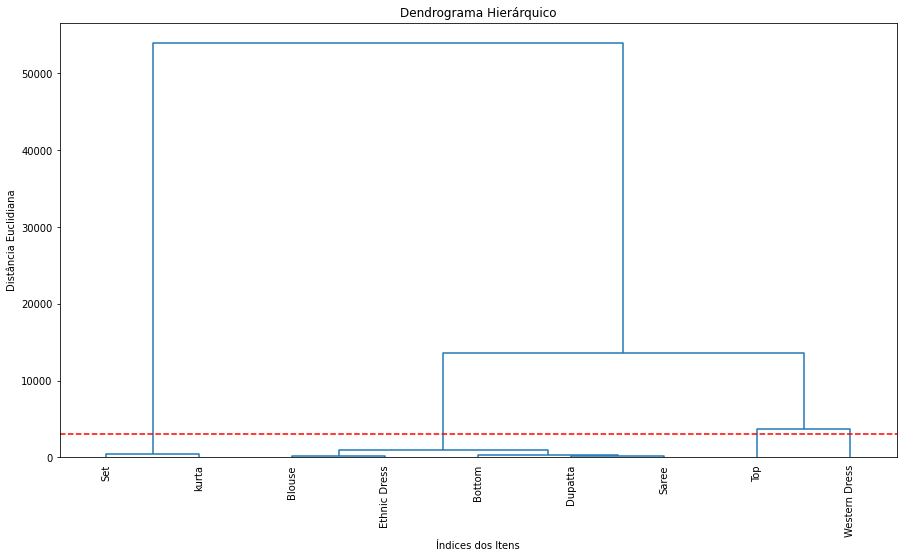

In [221]:
dist_euclidiana = pdist(df_cluster, metric='euclidean')

clusters = linkage(dist_euclidiana, method='ward')  # Método 'ward' para minimização da variância

# Plota o dendrograma
plt.figure(figsize=(15, 8))
dendrogram_c = dendrogram(clusters, labels=df_cluster.index, orientation='top', leaf_rotation=90, leaf_font_size=10, color_threshold = 4.5)
plt.title('Dendrograma Hierárquico')
plt.xlabel('Índices dos Itens')
plt.ylabel('Distância Euclidiana')
plt.axhline(y = 3000, color = 'red', linestyle = '--')
plt.show()

Analisando o dendrograma e utilizando o método do salto na distância vertical, podemos interpretar como os clusters são formados hierarquicamente. No dendrograma:

- **Identificamos os Saltos Significativos:** Observamos os pontos onde a distância vertical entre os clusters aumenta abruptamente. Esses saltos indicam uma divisão substancial nos dados, sugerindo que os clusters formados após esses pontos são mais distintos em termos de características dos dados.

- **Decisão sobre o Número de Clusters:** Utilizamos o método do maior salto para escolher o número de clusters antes de um grande aumento na distância vertical. Isso garante que os clusters sejam suficientemente distintos sem subdividir excessivamente os dados.

Ao aplicar esse método ao dendrograma, conseguimos determinar objetivamente o número ideal de clusters, o que facilita a interpretação dos grupos formados e ajuda na aplicação de análises mais detalhadas sobre cada cluster identificado.

Com isso foram definidos 4 clusters.

In [227]:
# Coeficientes do esquema hierárquico de aglomeração (ward)
coef_avg = [y[1] for y in dendrogram_c['dcoord']]

sorted(coef_avg)

[121.59769734661919,
 134.6291201783626,
 252.55626435839338,
 464.4362173646668,
 939.9491120977418,
 3728.2620616045756,
 13568.989824491093,
 53889.25411051168]

In [226]:
# Gerando a variável com a indicação do cluster no dataset

cluster_avg = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
indica_cluster_avg = cluster_avg.fit_predict(df_cluster)
df_cluster['cluster_ward_linkage'] = indica_cluster_avg
df_cluster['cluster_ward_linkage'] = df_cluster['cluster_ward_linkage'].astype('category')

In [223]:
df_cluster.sort_values(by='cluster_ward_linkage')

Fulfilment,Amazon,Merchant,cluster_ward_linkage
Category,,,
Blouse,644,187,0
Bottom,224,160,0
Dupatta,3,0,0
Ethnic Dress,759,257,0
Saree,122,25,0
Set,30880,12153,1
kurta,31065,11727,1
Western Dress,7535,5883,2
Top,7198,2170,3


Os resultados da tabela fornecem uma visão da distribuição de produtos por categoria e tipo de fulfilment (Amazon e Merchant), juntamente com os clusters resultantes do método de Ward (cluster_ward_linkage). Aqui estão algumas maneiras de utilizar esses resultados:

- **Segmentação de Produtos por Fulfilment:** Os clusters ajudam a entender como diferentes tipos de produtos são distribuídos entre os métodos de fulfilment da empresa. Isso pode ser útil para gestão de inventário, estratégias de marketing e alocação de recursos específicos para cada tipo de fulfilment.

- **Análise de Desempenho por Categoria:** Com base nos clusters, é possível comparar o desempenho de vendas entre categorias de produtos agrupadas. Isso pode revelar insights sobre quais categorias são mais populares ou lucrativas em diferentes tipos de fulfilment.

- **Avaliação de Eficiência Operacional:** Os clusters também podem ser usados para avaliar a eficiência operacional, identificando áreas onde ajustes nos processos de fulfilment podem ser necessários com base nas características dos produtos.

- **Planejamento Estratégico:** Utilize esses clusters para orientar decisões estratégicas, como expansão de inventário, escolha de fornecedores ou adaptação de políticas de preços, considerando as especificidades de cada grupo de produtos e métodos de fulfilment.